# How data can answer questions about Heart Disease Risk Factors

## Author: Natalie Gilbert


![title](heart.jpeg)


### Table of Contents

1. Introduction
2. Real-world Relevance
3. Exploratory Data Analysis (EDA)
4. Final Conclusions

## Introduction

For this first data science project, I decided to use a Heart Failure Prediction dataset from kaggle: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

I'll be performing my analysis using the CRISP-DM procedure, which describes the industry standard of what the end-to-end process of data analysis/data science should entail:

1. Business Understanding
2. Data Understanding
3. Preparing Data
4. Data Modeling
5. Evaluating Results
6. Deployment

## Business Understanding

I am a data scientist who, for a long time, wanted to go to medical school. Being in a family full of doctors and engineers, I was naturally pulled into both directions. As I grew up, I began to realize that, while big data and technology has advanced so many different silos, the relationship between Computer Science and Medicine is still at its infancy. We still find doctors and nurses manually taking vitals and making diagnoses from limited knowledge. Being a big data ninja who is particularly passionate about heart disease because of its prevalance in my family, I decided to analyze a heart disease dataset to understand how different blood markers and diseases can correlate to heart disease mortality. In this way, doctors can use these insights to better catch signs of heart disease before it's too late. Here are some questions that I'm interested in answering:

1. What demographic patterns are associated with heart disease mortality?
2. Are any other illnesses associated with heart disease mortality?
3. Are there blood markers that correlate with heart disease mortality that doctors can use to diagnose early?


## Exploratory Data Analysis

### Prepare Data

In [1]:
# import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from PIL import Image

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### From looking at our data, it looks like we have 13 columns and 299 rows

#### Columns:
1. _Age:_ A floating point number that indicates patient's age. Ranges from 40-95 yrs old
2. _Anaemia_: A boolean indicating whether or not patient is anaemic (1 = Yes, 0 = No)
3. _creatinine_phosphokinase_: An integer indicating levels of creatinine_phosphokinase, which is a marker for injury to the muscle tissue, the heart, or the brain
4. _diabetes_: A boolean indicating whether or not patient has diabetes (1 = Yes, 0 = No)
5. _ejection_fraction_: An integer indicating patient's ejection_fraction value, which is a measure of how well blood is being pumped in the left ventricle of the heart
6. _high_blood_pressure_: A boolean indicating whether or not patient has high blood pressure (1 = Yes, 0 = No)
7. _platelets_: A floating point number indicating patient's platelet count. Platelets are colorless disks found in your blood that are important for clotting. Too much clotting isn't good though, as seen in some patients with heart disease.
8. _serum_creatinine_: A floating point number indicating bloodstream levels of creatinine, a waste product made by your muscles as part of regular, everyday activity
9. _serum_sodium_: 
10. _sex_: boolean indicating patient's sex (1 = Male, 0 = female)
11. _smoking_: A boolean indicating whether or not the patient is a smoker (1 = Yes, 0 = No)
12. _time_: no information was actually specified on what this field indicates
13. _DEATH_EVENT_: A boolean indicating whether or not the patient passed away (1 = Yes, 0 = No)

#### Looking at some of the column names, we see that they're not super intuitive and that some of the values and names need to be changed

In [4]:
df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

For starters, the 1-0 designation for sex isn't very intuitive. Knowing that 1 = Male and 0 = Female, let's just change their values accordingly

In [5]:
df.loc[df['sex'] == 1, 'sex'] = 'Male'
df.loc[df['sex'] == 0, 'sex'] = 'Female'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 30.5+ KB


In [7]:
# change names to be more intuitive
df.rename(columns={'anaemia': 'anaemia_yn', 'diabetes': 'diabetes_yn', 'high_blood_pressure': 'high_blood_pressure_yn', 'smoking':'smoking_yn', 'DEATH_EVENT':'DIED_YN', 'platelets':'platelet_count'}, inplace=True)


In [8]:
df.describe()

,age,anaemia_yn,creatinine_phosphokinase,diabetes_yn,ejection_fraction,high_blood_pressure_yn,platelet_count,serum_creatinine,serum_sodium,smoking_yn,time,DIED_YN
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.00000,285.000000,1.00000


In [9]:
# check for duplicate rows
sum(df.duplicated())

0

# Data Cleansing

First, let's make a copy of the data. That way we don't need to re-run our script every time a change is made to the dataframe

In [10]:
df_copy = df.copy()

### Quality and Integrity Checks

Let's go ahead and drop the time column. It doesn't provide us with any useful information that can help us answer our questions from the Assess Phase

In [11]:
cols_to_drop = ['time']
df_copy = df_copy.drop(cols_to_drop, axis=1)

In [12]:
# confirm dropping worked
df_copy.columns

Index(['age', 'anaemia_yn', 'creatinine_phosphokinase', 'diabetes_yn',
       'ejection_fraction', 'high_blood_pressure_yn', 'platelet_count',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking_yn', 'DIED_YN'],
      dtype='object')

Let's assess if we have any missing values of interest.

Looks like we have no missing values!

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia_yn                299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes_yn               299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure_yn    299 non-null    int64  
 6   platelet_count            299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking_yn                299 non-null    int64  
 11  DIED_YN                   299 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 28.2+ KB


## Exploratory Data Analysis: Analyze and Visualize

## 1. What demographic patterns are associated with heart disease mortality?

Let's start by taking a look at the age range of our sample of heart disease patients

In [14]:
print("Max age: " + str(df_copy['age'].max()) + " Min age: " + str(df_copy['age'].min()))

Max age: 95.0 Min age: 40.0


Looks like we have quite the age difference, so we're seeing heart disease presentations in both younger and older people

Let's see what the most common ages are for heart disease in our sample

In [15]:
df_copy['age'].value_counts().head(10)

60.0    33
50.0    27
65.0    26
70.0    25
45.0    19
55.0    17
75.0    11
58.0    10
53.0    10
63.0     8
Name: age, dtype: int64

Interesting. Looks like our sample doesn't really indicate any kind of pattern as to what age heart disease could be most common. Let's try to visualize this

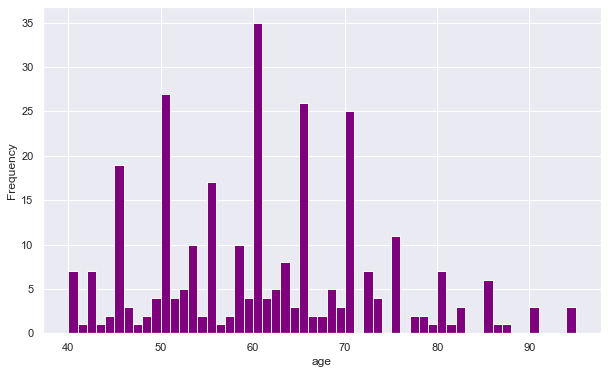

In [16]:
# plot the distribution of points
plt.figure(figsize=(10,6))
bin_edges = np.arange (40, df_copy['age'].max()+1, 1)
plt.hist(data = df_copy, x = 'age', bins = bin_edges, color = 'purple')
plt.xlabel('age')
plt.ylabel('Frequency');

As we can see from the plot, the distribution isn't normal, but we should definitely take note of the generally right-skewed distribution

Let's see what the age distribution is for people who passed away due to heart disease and didn't pass away

In [43]:
def plot_hist(df, pivot_column, column_name):
    '''plot_hist()
        Purpose: plots a groupby hist graph
        Inputs: column name that we are pivoting on
        Outputs: a stacked histogram
    '''
    exec("df.pivot(columns=pivot_column)." + column_name + ".plot(kind = 'hist', stacked=True)")

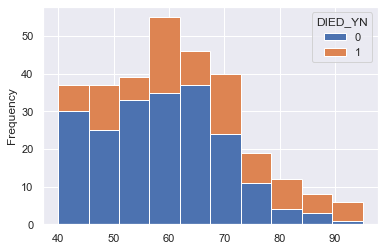

In [44]:
plot_hist(df_copy, 'DIED_YN', 'age')

Let's see what sex these people are.

In [38]:
def plot_bar(df, groupby_column, column_name):
    '''plot_bar()
        Purpose: plots a groupby bar graph
        Inputs: column name that we are grouping on
        Outputs: a bar graph
    '''
    exec( "df.groupby(groupby_column)." + column_name + ".value_counts().unstack(0).plot.barh()")

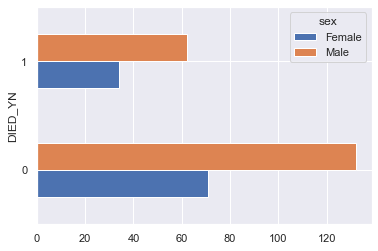

In [39]:
plot_bar(df_copy, 'sex', 'DIED_YN')

Looks like more males died of heart disease than females, but more males also survived heart diseasse than did females. This is most likely because there are more men in the data than females. Could potentially mean that more men are susceptible to heart disease than females are, but that's outside of the scope of this analysis.

## 2. Are any other illnesses associated with heart disease mortality?

Thankfully, our data provides us with a few different preceding diseases like anaemia, high blood pressure, and ...

Let's start by assessing the correlation between heart disease mortality and anaemia

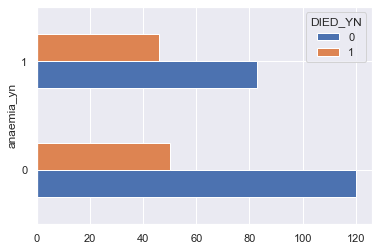

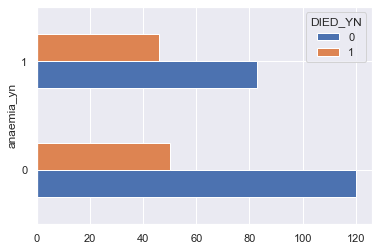

In [40]:
plot_bar(df_copy, 'DIED_YN', 'anaemia_yn')

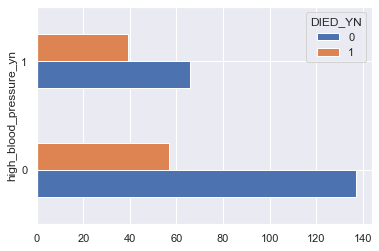

In [41]:
plot_bar(df_copy, 'DIED_YN', 'high_blood_pressure_yn')

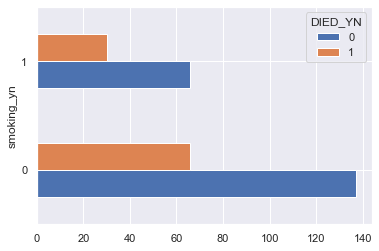

In [42]:
plot_bar(df_copy, 'DIED_YN', 'smoking_yn')

<AxesSubplot:ylabel='diabetes_yn'>

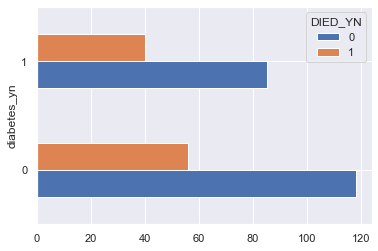

In [22]:
plot_bar(df_copy, 'DIED_YN', 'diabetes_yn')

We can see that, with all four of these bar graphs, fewer people with these conditions are dying of heart disease. Weird.

Let's take a look at a correlation matrix to see if there are any diseases that might be statistically correlated to heart disease mortality

In [23]:
df_diseases = df_copy[['diabetes_yn', 'high_blood_pressure_yn', 'smoking_yn', 'anaemia_yn', 'DIED_YN']]

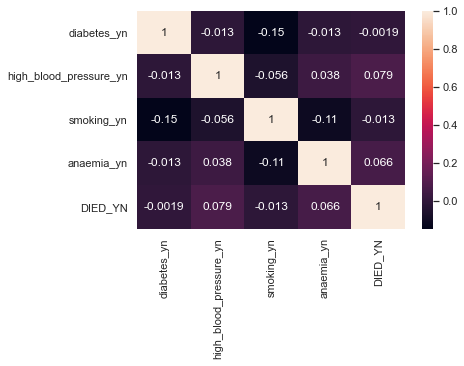

In [24]:
corrMatrix = df_diseases.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

The results don't show any strong correlations between heart disease mortality and the four aforementioned diseases, with high blood pressure being the strongest. Keep in mind, though, that our sample is very small, so I'm hesitant to say that these diseases have barely any relationship to heart disease mortality

## 3. Are there blood markers that correlate with heart disease mortality that doctors can use to diagnose early?


#### Our data presents us with a few blood markers that could potentially help to predict the progression of heart disease. We'll be analyzing:

- Platelet Count
- Serum Sodium Levels
- Serum Creatinine
- Ejection Fraction
- Creatinine Phosphokinase

Let's take a look at the correlation between heart disease mortality and the aforementioned blood markers:

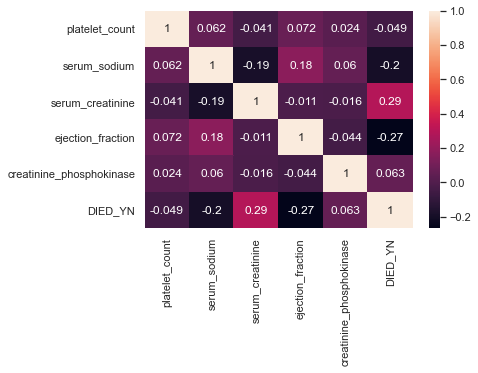

In [25]:
df_blood_markers = df_copy[['platelet_count', 'serum_sodium', 'serum_creatinine', 'ejection_fraction', 'creatinine_phosphokinase', 'DIED_YN']]

corrMatrix = df_blood_markers.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Okay, the results here are a little more promising. It looks like serum_creatinine and ejection_fraction levels are correlated with heart disease mortality, with serum creatinine being positively correlated and ejection_fraction being negatively correlated. These observations are in line with the medical understanding of the relationship between these blood markers and heart disease. Serum_creatinine is a waste product due to heart tissue damage, so we'd expect to see higher levels of it in people who die from heart disease. On the other hand, ejection_fraction describes how much blood is being pumped with each contraction, so you'd expect that, with someone with severe heart disease, the blood being pumped is minimal

Let's take a look and see how the serum creatinine levels differ based on whether or not the patient died

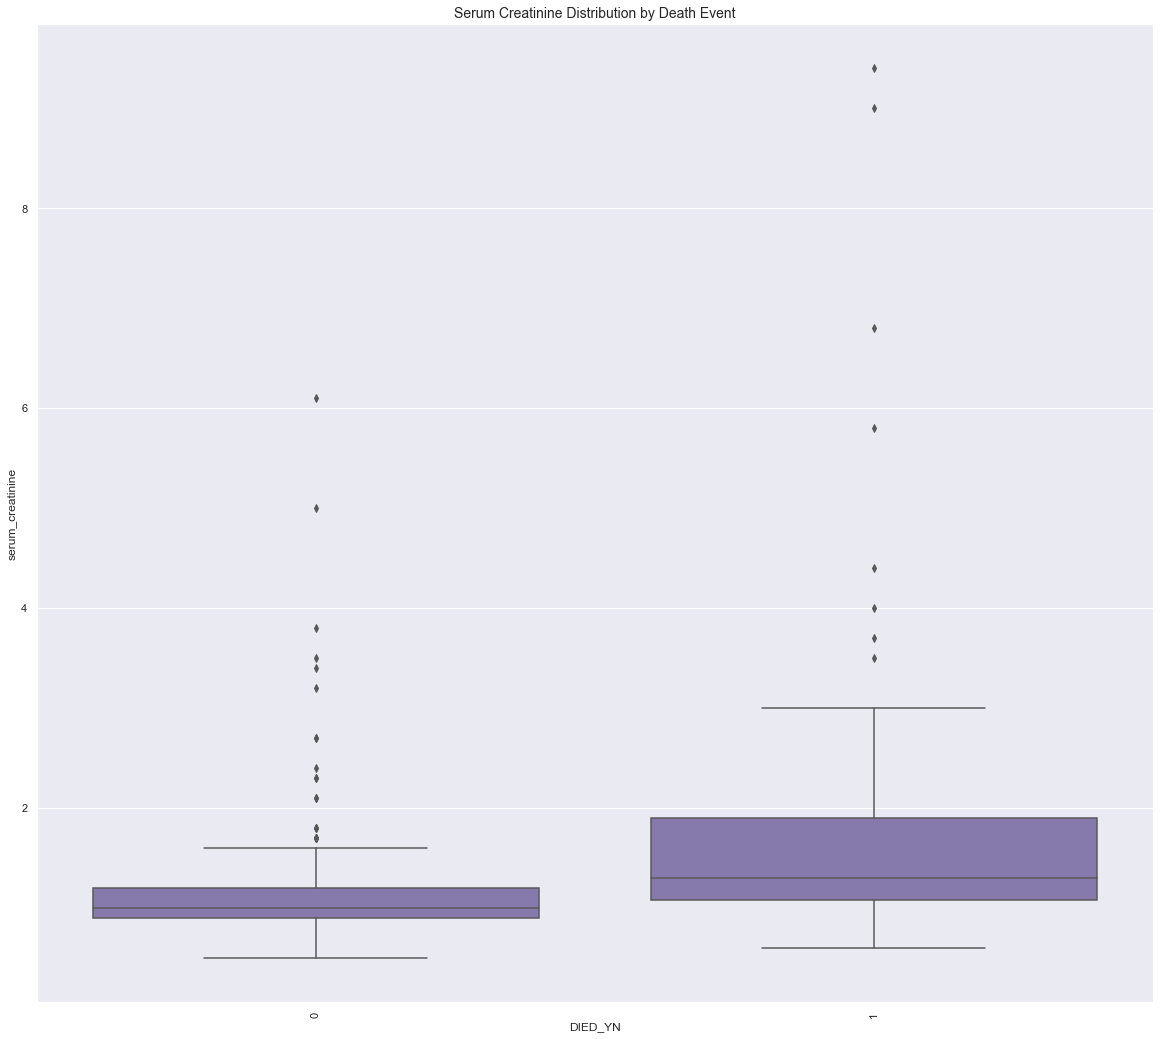

In [26]:
# boxplot of serum creatinine levels based on whether or not the patient died of heart diseas
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = df_blood_markers, x = 'DIED_YN', y = 'serum_creatinine', color = base_color, order = df_blood_markers.DIED_YN.value_counts().index)
plt.title('Serum Creatinine Distribution by Death Event', fontsize = 14)
plt.xlabel('DIED_YN')
plt.ylabel('serum_creatinine')
plt.xticks(rotation=90);

Looks like there's a sizable different in the serum creatinine levels

Let's repeat the same exercise, but for the ejection fraction

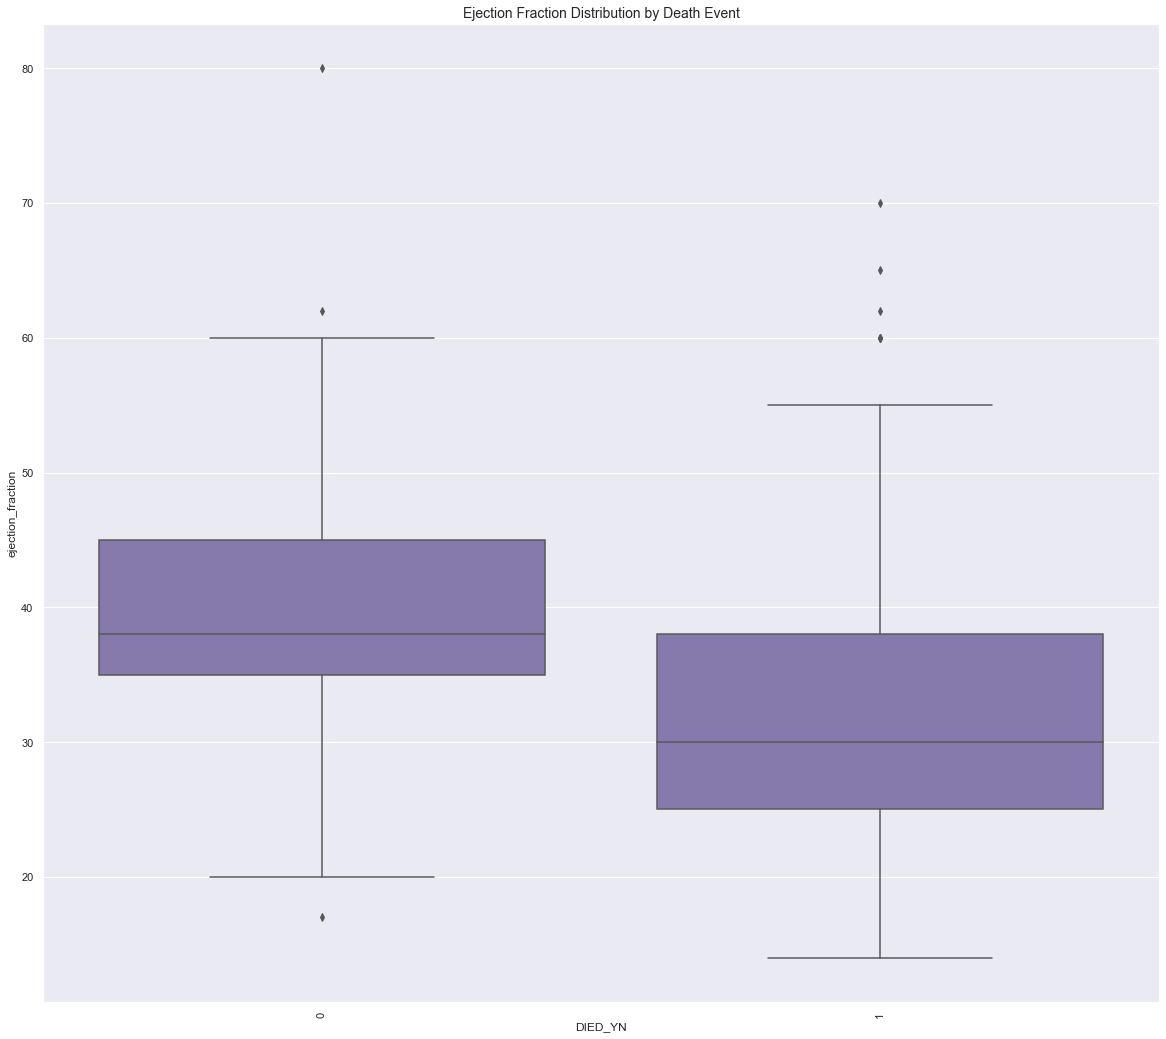

In [27]:
# boxplot of the ejection fraction based on whether or not the patient died of heart diseas
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = df_blood_markers, x = 'DIED_YN', y = 'ejection_fraction', color = base_color, order = df_blood_markers.DIED_YN.value_counts().index)
plt.title('Ejection Fraction Distribution by Death Event', fontsize = 14)
plt.xlabel('DIED_YN')
plt.ylabel('ejection_fraction')
plt.xticks(rotation=90);

Looks like there's a pretty big difference in the average ejection fraction based on the death event, but it's also interesting that there are some pretty crazy, unexpected outliers on the right side

# Conclusions



Business insights can be found in this Medium Blog: https://medium.com/@nataliegilbert42/how-data-can-answer-questions-about-heart-disease-risk-factors-6975f46f3d33

While more data is needed to make more solid conclusions, we can conclude the following given what we have:

- Heart disease is very prevalant across a wide range of ages, but seems to be more common in the 60-75 age range
- The majority of people who died due to heart disease were females in their 60's
- None of the four preceding diseases in the data were strongly correlated to heart disease mortality
- Some blood markers like ejection_fraction and serum_creatinine are moderately correlated to heart disease mortality, which doctors could test to help address symptoms of heart disease before it's too late